In [2]:
import pandas as pd
df = pd.read_csv("ObesityDataSet.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
# Create a copy of the dataframe to keep the original safe
df_encoded = df.copy()

In [5]:
# Initialize LabelEncoder
le = LabelEncoder()

In [6]:
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 
                    'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Apply Label Encoder to each categorical column
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Check the head again to see the numbers
df_encoded.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,classification_report

y = df_encoded['NObeyesdad']
X = df_encoded.drop(['NObeyesdad'],axis=1)


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred = rf_model.predict(X_test)
#Calculate and print the accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 95.51%


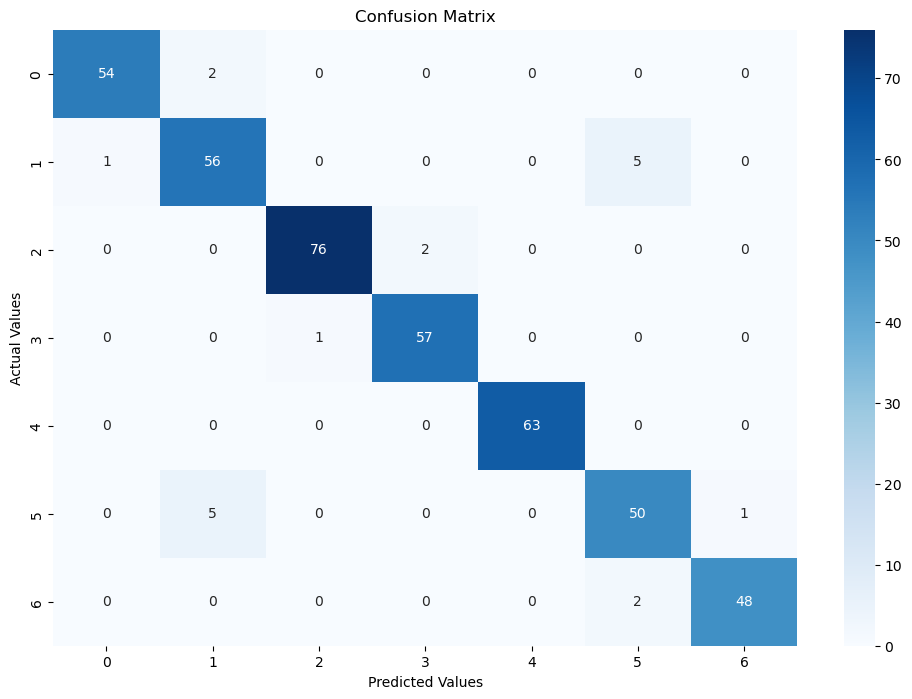

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix

# Calculate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create the heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the title and axis labels
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")  
plt.xlabel("Predicted Values")

# Show the plot
plt.show()

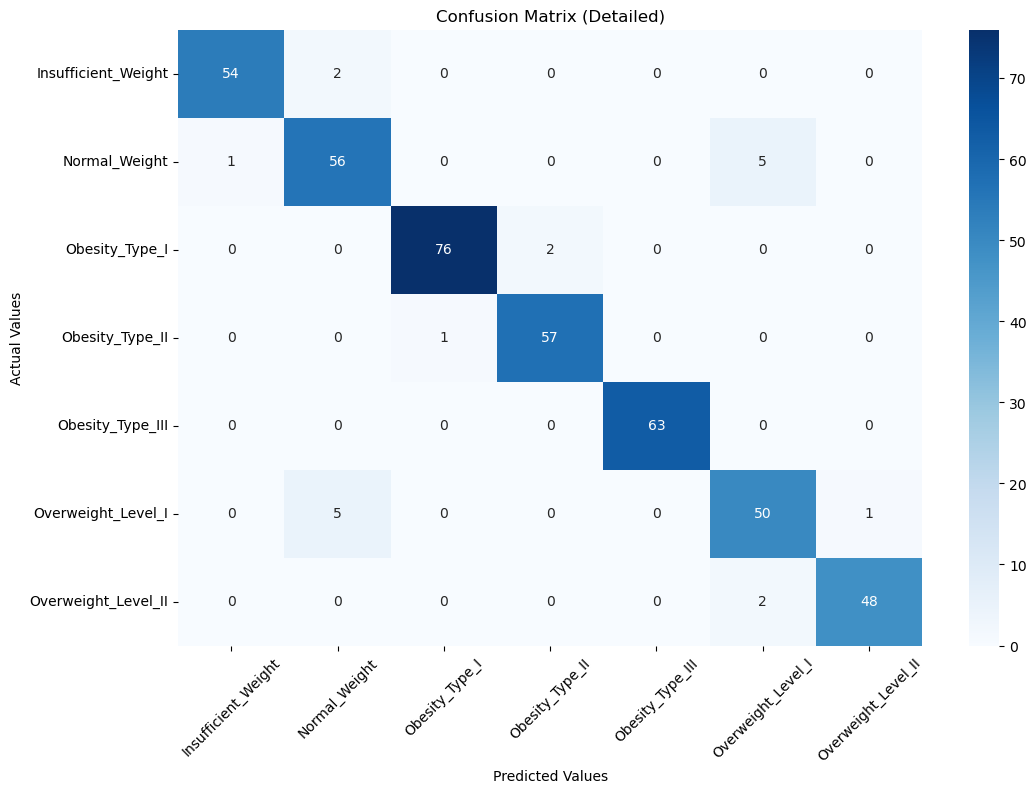

In [19]:
# Get class names from LabelEncoder (to convert numbers back to names)
class_names = le.classes_

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap using class names for axis labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

# Set the title and axis labels in English
plt.title('Confusion Matrix (Detailed)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()